<a href="https://colab.research.google.com/github/Amitarajak/speech_emotion2/blob/main/speeeech_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation

from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf
print ("Done")

Done


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory_path = '/content/drive/MyDrive/speach emotion'

In [ ]:
file_list = os.listdir(directory_path)

# Loading each .wav file in the directory
for file_name in file_list:
    if file_name.endswith('.wav'):
        file_path = os.path.join(directory_path, file_name)
        audio_data, sr = librosa.load(file_path, sr=None)

In [ ]:
import os
import random
import librosa
import IPython.display as ipd

# Directories containing the audio files
directory_paths = ['/content/drive/MyDrive/speach emotion/DEMOS']

# Getting a list of all .wav files in the directories
wav_files = []
for directory_path in directory_paths:
    wav_files.extend([os.path.join(directory_path, file) for file in os.listdir(directory_path) if file.endswith('.wav')])

# Choosing a random .wav file from the list
random_wav_file = random.choice(wav_files)

# Loading the audio data and sampling rate
audio_data, sr = librosa.load(random_wav_file, sr=None)

# Playing the randomly selected audio file
ipd.Audio(audio_data, rate=sr)


In [ ]:
import os
import pandas as pd

paths = []
labels = []

# Defining the mapping of emotions to their corresponding codes
emotion_to_code = {
    'Guilt': 'col',
    'Disgust': 'dis',
    'Happiness': 'gio',
    'Fear': 'pau',
    'Anger': 'rab',
    'Surprise': 'sor',
    'Sadness': 'tri',


}

# Paths to the directories containing .wav files
directory_paths = ['/content/drive/MyDrive/speach emotion/DEMOS']

# Iterating over each directory
for directory_path in directory_paths:
    # Extracting the label from the directory name
    label = os.path.basename(directory_path)
    # Iterating over the files in the directory
    for root, dirs, files in os.walk(directory_path):
        for file_name in files:
            # Appending the file path to paths
            file_path = os.path.join(root, file_name)
            paths.append(file_path)
            # Using the file name to determine the emotion label
            emotion = None
            for emotion_name, emotion_code in emotion_to_code.items():
                if emotion_code in file_name:
                    emotion = emotion_name
                    break
            labels.append(emotion)

# Creating a DataFrame
df = pd.DataFrame({'speech': paths, 'label': labels})

# Displaying the DataFrame
print(df.head)


<bound method NDFrame.head of                                                  speech    label
0     /content/drive/MyDrive/speach emotion/DEMOS/PR...  Disgust
1     /content/drive/MyDrive/speach emotion/DEMOS/PR...  Disgust
2     /content/drive/MyDrive/speach emotion/DEMOS/PR...  Disgust
3     /content/drive/MyDrive/speach emotion/DEMOS/PR...  Disgust
4     /content/drive/MyDrive/speach emotion/DEMOS/PR...  Disgust
...                                                 ...      ...
9380  /content/drive/MyDrive/speach emotion/DEMOS/NP...     Fear
9381  /content/drive/MyDrive/speach emotion/DEMOS/NP...    Anger
9382  /content/drive/MyDrive/speach emotion/DEMOS/NP...    Anger
9383  /content/drive/MyDrive/speach emotion/DEMOS/NP...    Anger
9384  /content/drive/MyDrive/speach emotion/DEMOS/NP...    Anger

[9385 rows x 2 columns]>


In [ ]:
label_counts = df['label'].value_counts()
print(label_counts)

label
Disgust      1693
Sadness      1530
Anger        1477
Happiness    1395
Fear         1156
Guilt        1134
Surprise     1000
Name: count, dtype: int64


<ipython-input-10-e7b907fa82ba>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


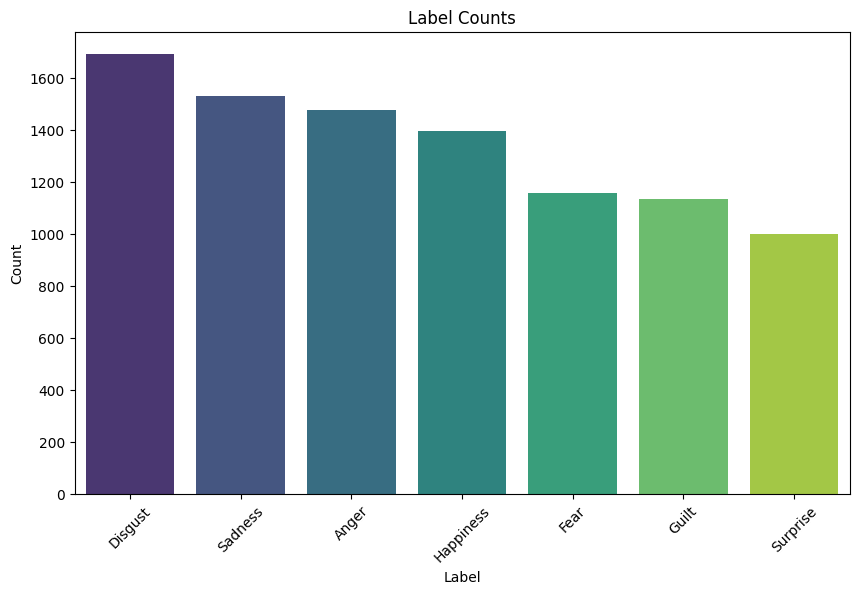

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Counting the occurrences of each label
label_counts = df['label'].value_counts()

# Creating a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Label Counts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


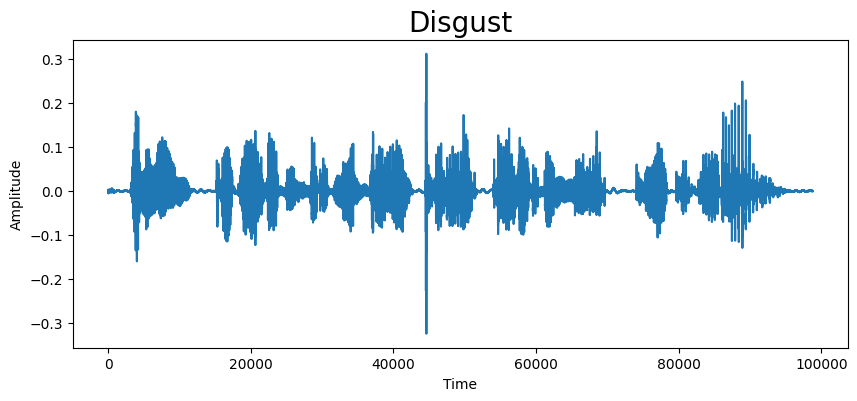

<ipython-input-11-18ec221d0617>:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(data)), sr=sr, x_axis='time', y_axis='hz')


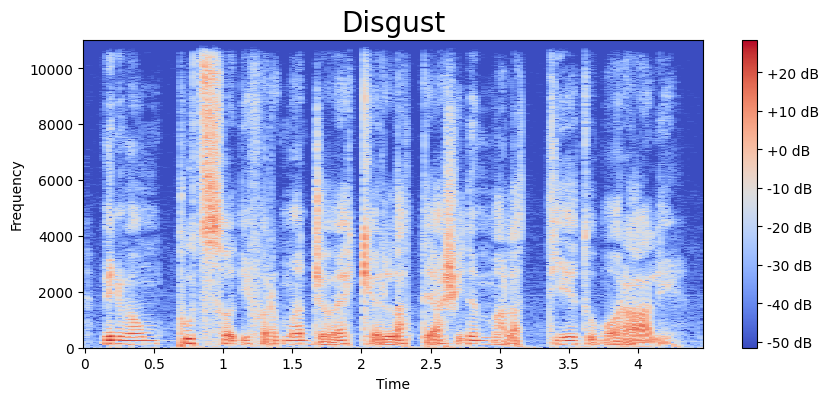

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

# Functioning to plot the waveform
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    plt.plot(data)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

# Functioning to plot the spectrogram
def spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(data)), sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

#  these functions are used to visualize the waveform and spectrogram
emotion = 'Disgust'
filtered_df =df[df['label'] == emotion]
if not filtered_df.empty:
    paths = filtered_df['speech'].iloc[0]  # Getting the path of the first matching row
    data, sampling_rate = librosa.load(paths)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
else:
    print(f"No data found for emotion: {emotion}")

Audio(paths)


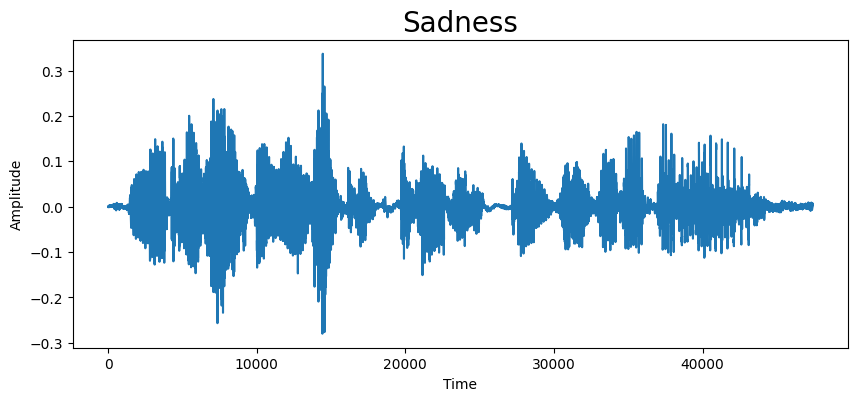

<ipython-input-11-18ec221d0617>:17: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(data)), sr=sr, x_axis='time', y_axis='hz')


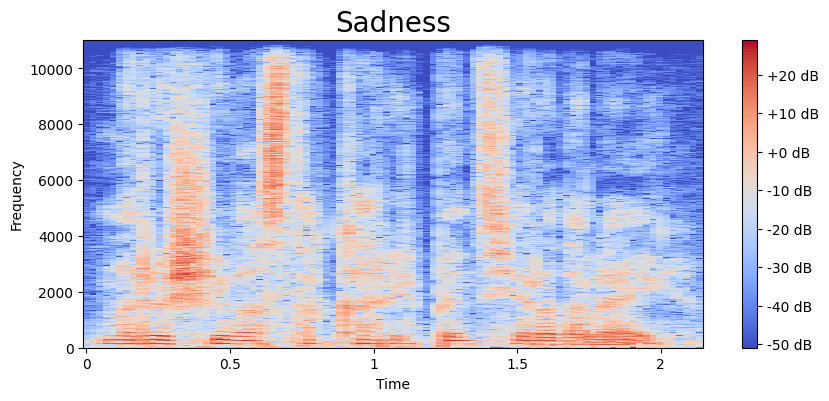

In [ ]:
emotion = 'Sadness'
filtered_df =df[df['label'] == emotion]
if not filtered_df.empty:
    paths = filtered_df['speech'].iloc[0]  # Getting the path of the first matching row
    data, sampling_rate = librosa.load(paths)
    waveplot(data, sampling_rate, emotion)
    spectrogram(data, sampling_rate, emotion)
else:
    print(f"No data found for emotion: {emotion}")

Audio(paths)

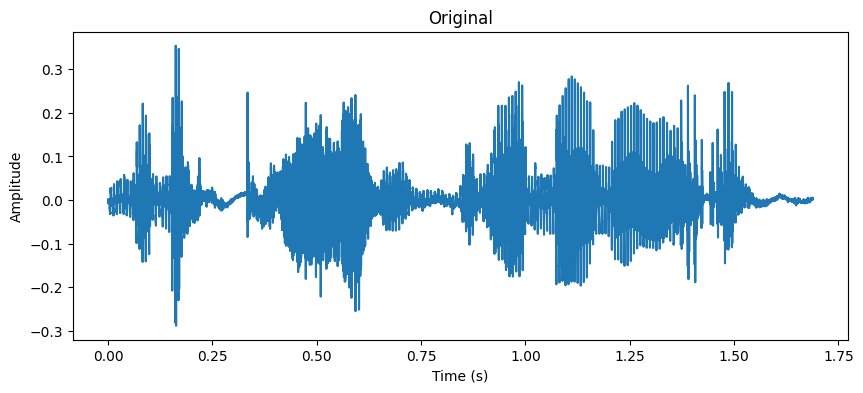

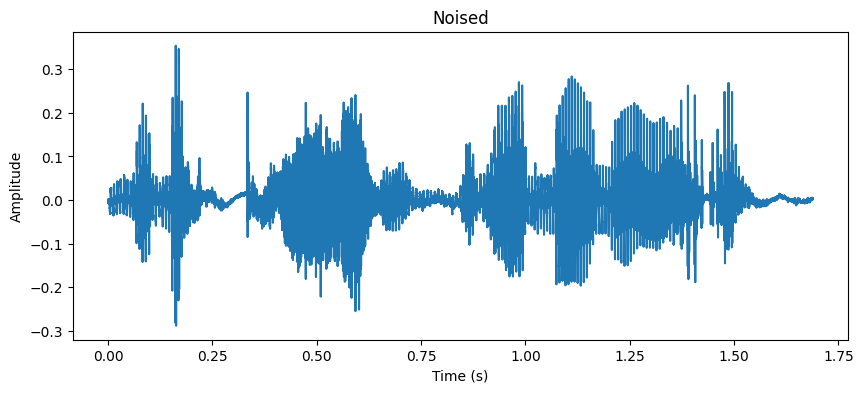

In [ ]:
import os
import random
import librosa
import numpy as np
import soundfile as sf
import IPython.display as ipd
import matplotlib.pyplot as plt

def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def visualize_waveform(data, sr, title):
    plt.figure(figsize=(10, 4))
    plt.title(title)
    plt.plot(np.arange(len(data)) / sr, data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Directories containing the original audio files
directory_paths = ['/content/drive/MyDrive/speach emotion/DEMOS']

# Choosing a random directory
directory_path = random.choice(directory_paths)

# Getting a list of all .wav files in the directory
wav_files = [file for file in os.listdir(directory_path) if file.endswith('.wav')]

# Choosing a random .wav file from the list
random_wav_file = random.choice(wav_files)

# Constructing the full path to the randomly selected .wav file
random_wav_path = os.path.join(directory_path, random_wav_file)

# Loading the original audio data and sampling rate
original_audio_data, sr = librosa.load(random_wav_path, sr=None)

# Applying each effect to the original audio data
noised_audio=noise(original_audio_data)
visualize_waveform(original_audio_data, sr, 'Original')
visualize_waveform(original_audio_data, sr, 'Noised')

In [ ]:
print("Playing original audio...")
ipd.display(ipd.Audio(original_audio_data, rate=sr))
print("Playing noised audio...")
ipd.display(ipd.Audio(noised_audio, rate=sr))

Playing original audio...


Playing noised audio...


In [ ]:
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
   mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13, n_fft=frame_length, hop_length=hop_length)
   return np.ravel(mfcc.T) if flatten else mfcc.T
#def rmse(data, frame_length=2048, hop_length=512):
    #rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    #return np.squeeze(rmse)
def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
          result=np.array([])

          result=np.hstack((result,
                      mfcc(data,sr,frame_length,hop_length)
                     ))
          return result

def get_features(data, sr=22050, duration=2.5, offset=0.6):
    # data: audio data
    # sr: sampling rate
    # duration: duration of audio segment to load
    # offset: offset to start loading audio

    aud = extract_features(data, sr)
    audio = np.array(aud)

    noised_audio = noise(data)
    aud2 = extract_features(noised_audio, sr)
    audio = np.vstack((audio, aud2))

    return audio

In [ ]:
import numpy as np
import pandas as pd
import librosa
from tqdm import tqdm

# Assuming 'paths' is a list of file paths and 'labels' is a list of corresponding labels
df = pd.DataFrame({'speech': paths, 'label': labels})

# Defining the duration and offset for loading audio
duration = 3.0
offset = 0.6

# Initializing X and Y lists
X, Y = [], []

# Iterating over each row in the DataFrame
for index, row in tqdm(df.iterrows(), total=len(df)):
    path = row['speech']
    emotion = row['label']

    try:
        # Loading audio data and convert to NumPy array
        data, sr = librosa.load(path, duration=duration, offset=offset)
        data = np.array(data)

        # Checking if the data array is empty or too small
        if len(data) == 0 or data.size < 10:  # Adjust threshold as needed
            print(f'Skipping {path}: Audio data is empty or too small')
            continue

        # Extracting features from the original audio data
        features = get_features(data, sr)

        # Appending the features and labels to X and Y
        for i in features:
            X.append(i)
            Y.append(emotion)

        # Extracting features from the noised audio data
        noised_data = noise(data)
        noised_features = get_features(noised_data, sr)

        # Appending the features and labels to X and Y
        for i in noised_features:
            X.append(i)
            Y.append(emotion)

        if index % 500 == 0:
            print(f'{index} audio files have been processed')
    except Exception as e:
        print(f'Error processing {path}: {str(e)}')




  0%|          | 4/9385 [00:01<51:49,  3.02it/s]  

0 audio files have been processed


  5%|▌         | 503/9385 [00:27<12:19, 12.01it/s]

500 audio files have been processed


 11%|█         | 1004/9385 [00:51<06:07, 22.83it/s]

1000 audio files have been processed


 16%|█▌        | 1505/9385 [01:16<05:28, 24.02it/s]

1500 audio files have been processed


 21%|██▏       | 2002/9385 [01:41<05:16, 23.31it/s]

2000 audio files have been processed


 27%|██▋       | 2503/9385 [02:06<09:02, 12.69it/s]

2500 audio files have been processed


 32%|███▏      | 3005/9385 [02:31<04:30, 23.58it/s]

3000 audio files have been processed


 37%|███▋      | 3503/9385 [02:56<04:12, 23.33it/s]

3500 audio files have been processed


 43%|████▎     | 4004/9385 [03:22<03:50, 23.32it/s]

4000 audio files have been processed


 48%|████▊     | 4502/9385 [03:46<06:31, 12.48it/s]

4500 audio files have been processed


 53%|█████▎    | 5004/9385 [04:10<03:03, 23.87it/s]

5000 audio files have been processed


 59%|█████▊    | 5505/9385 [04:35<02:49, 22.83it/s]

5500 audio files have been processed


 64%|██████▍   | 6005/9385 [05:01<02:19, 24.22it/s]

6000 audio files have been processed


 69%|██████▉   | 6502/9385 [05:25<04:11, 11.47it/s]

6500 audio files have been processed


 75%|███████▍  | 7005/9385 [05:50<01:42, 23.16it/s]

7000 audio files have been processed


 80%|███████▉  | 7504/9385 [06:16<01:19, 23.54it/s]

7500 audio files have been processed


 85%|████████▌ | 8005/9385 [06:41<00:59, 23.16it/s]

8000 audio files have been processed


 91%|█████████ | 8504/9385 [07:07<00:41, 21.06it/s]

8500 audio files have been processed


 96%|█████████▌| 9003/9385 [07:31<00:29, 12.98it/s]

9000 audio files have been processed


100%|██████████| 9385/9385 [07:52<00:00, 19.88it/s]


In [ ]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('/content/drive/My Drive/emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,862,863,864,865,866,867,868,869,870,Emotions
0,-221.474091,62.210575,28.708206,23.038380,-15.575979,30.735157,1.846696,18.481150,-6.354119,11.336761,...,13.780577,13.642862,-0.738261,-5.525843,-5.842218,9.544970,5.329741,-5.225720,-14.382200,Disgust
1,-218.241169,57.683742,31.139020,22.342739,-9.735556,27.055234,1.739087,14.268883,-3.144309,8.608548,...,12.584632,12.507445,4.482750,-5.305180,-2.786476,-1.855515,-1.435963,-3.900438,-7.054958,Disgust
2,-215.055068,57.390912,31.270850,20.436014,-11.400187,26.248393,5.243757,15.863968,-4.125870,7.680070,...,12.707837,6.145554,1.887902,0.509881,3.811744,5.542799,4.593938,-4.604924,-7.823770,Disgust
3,-215.097994,57.175671,31.574719,20.470243,-11.349461,26.063732,5.483395,15.551694,-4.436681,7.765138,...,13.440040,5.607914,1.659075,0.892399,3.663199,4.994122,4.435979,-4.334032,-8.315978,Disgust
4,-221.474091,62.210575,28.708206,23.038380,-15.575979,30.735157,1.846696,18.481150,-6.354119,11.336761,...,13.780577,13.642862,-0.738261,-5.525843,-5.842218,9.544970,5.329741,-5.225720,-14.382200,Disgust


In [ ]:
Emotions.tail()

,0,1,2,3,4,5,6,7,8,9,...,862,863,864,865,866,867,868,869,870,Emotions
37535,-183.522092,38.562148,26.072284,18.545875,7.063619,15.986315,6.537739,7.864127,1.304407,3.454341,...,6.434398,5.441533,-0.052144,0.158828,1.179098,1.610088,-2.036660,-1.803647,-2.063965,Anger
37536,-221.474091,62.210575,28.708206,23.038380,-15.575979,30.735157,1.846696,18.481150,-6.354119,11.336761,...,13.780577,13.642862,-0.738261,-5.525843,-5.842218,9.544970,5.329741,-5.225720,-14.382200,Anger
37537,-194.720302,47.314778,31.008080,14.388710,-4.981237,18.581104,7.005771,11.631382,4.567288,4.786895,...,5.954800,-1.794632,-1.050329,-0.569374,2.451384,-0.036045,-1.737793,1.628923,-3.050810,Anger
37538,-205.327565,51.220869,29.012358,18.226183,-5.357703,20.057542,6.544539,15.093309,2.547623,4.663602,...,9.054893,6.343908,1.679805,-0.503406,-0.483055,-5.906429,-6.842823,-3.176314,1.535288,Anger
37539,-199.800164,47.482303,29.486617,18.462033,-5.503383,16.135319,6.310985,14.787494,5.711469,6.896821,...,8.883197,10.093644,5.478127,0.028955,0.095524,-8.909556,-7.355872,-1.788077,1.667707,Anger


In [ ]:
len(X)

37540

In [ ]:
len(Y)

37540

In [ ]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
867         False
868         False
869         False
870         False
Emotions    False
Length: 872, dtype: bool


In [ ]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
867         False
868         False
869         False
870         False
Emotions    False
Length: 872, dtype: bool


(37540, 872)

In [ ]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
867         0
868         0
869         0
870         0
Emotions    0
Length: 872, dtype: int64

In [ ]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [ ]:
Y.shape

(37540, 7)

In [ ]:
X.shape

(37540, 871)

In [ ]:
X = tf.keras.preprocessing.sequence.pad_sequences(X)
X.shape

(37540, 871)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((30032, 871), (30032, 7), (7508, 871), (7508, 7))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying PCA
pca = PCA(n_components=700)  # Choosing the number of components
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
x_train_pca.shape, y_train.shape, x_test_pca.shape, y_test.shape

((30032, 700), (30032, 7), (7508, 700), (7508, 7))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the training data and transform it
x_train_scaled = scaler.fit_transform(x_train_pca)

# Transforming the test data using the same scaler
x_test_scaled = scaler.transform(x_test_pca)

# Now both training and test data are scaled


In [ ]:
from sklearn.linear_model import LogisticRegression

# Creating an instance of Logistic Regression
lr = LogisticRegression(max_iter=5000)  # You may need to increase max_iter for convergence

# Flattening the multi-label y_train and y_test to make them compatible with Logistic Regression
y_train_flat = y_train.argmax(axis=1)
y_test_flat = y_test.argmax(axis=1)

# Training the Logistic Regression model
lr.fit(x_train_scaled, y_train_flat)

# Predicting the labels for the test set
y_pred = lr.predict(x_test_scaled)

# Evaluating the model
accuracy = lr.score(x_test_pca, y_test_flat)
print("Accuracy:", accuracy)


Accuracy: 0.15849760255727224


In [ ]:
X_train = x_train_scaled.reshape(x_train_scaled.shape[0] , x_train_scaled.shape[1] , 1)
X_test = x_test_scaled.reshape(x_test_scaled.shape[0] , x_test_scaled.shape[1] , 1)

In [ ]:
X_train.shape,X_test.shape

((30032, 700, 1), (7508, 700, 1))

In [ ]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model

In [ ]:
checkpoint_path = 'content/drive/My Drive/best_model1_weights.keras'
model_path = 'content/drive/My Drive/best_model1.keras'

# Define the callbacks
model_checkpoint = ModelCheckpoint(checkpoint_path,
                                   mode='max',
                                   monitor='val_accuracy',
                                   save_best_only=True)

In [ ]:
#early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)
#lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.5, min_lr=0.00001, verbose=1)

In [ ]:
import os
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Defining the model architecture
def create_model():
    model = Sequential()
    model.add(LSTM(512, return_sequences=True, input_shape=(700,1)))#(x_train_scaled.shape[1], 1)))
    model.add(Dropout(0.2))

    # Adding more LSTM layers
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.2))

    # Adding another LSTM layer with return_sequences=False
    model.add(LSTM(128))
    model.add(Dropout(0.2))

    # Adding a Dense layer with a different activation function
    model.add(Dense(64, activation='relu'))

    # Output layer
    model.add(Dense(7, activation='softmax'))

    return model

# Defining the path to the checkpoint


# Checking if the checkpoint exists
if os.path.exists(checkpoint_path):
    # Loading the model from the checkpoint
    model = load_model(checkpoint_path)
    print("Model loaded from checkpoint.")
else:
    # Creating a new model
    model = create_model()
    print("Created new model.")

# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Printing the model summary
model.summary()


Created new model.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 700, 512)          1052672   
                                                                 
 dropout (Dropout)           (None, 700, 512)          0         
                                                                 
 lstm_1 (LSTM)               (None, 700, 256)          787456    
                                                                 
 dropout_1 (Dropout)         (None, 700, 256)          0         
                                                                 
 lstm_2 (LSTM)               (None, 700, 128)          197120    
                                                                 
 dropout_2 (Dropout)         (None, 700, 128)          0         
                                                                 
 lstm_3 (LSTM)               (None, 1

In [ ]:
hist=model.fit(X_train, y_train,
            epochs=50,
            batch_size=64,validation_data=(X_test, y_test),
            verbose=1,callbacks=[model_checkpoint])
model.save(model_path)

NameError: name 'model' is not defined

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Testing Loss: {loss}, Testing Accuracy: {accuracy}')


NameError: name 'model' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Extracting loss and accuracy values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# Creating a range of epochs for plotting
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

encoder = LabelEncoder()
y_train_1d = np.argmax(y_train, axis=1)
# Fit the LabelEncoder with the original labels

encoder.fit(y_train_1d)


# predicting on test data.
pred_test0 = model.predict(X_test)
# Inversing transform the predicted labels
y_pred0 = encoder.inverse_transform(np.argmax(pred_test0, axis=1))
# Inversing transform the original labels and convert to 1D array
y_test0 = encoder.inverse_transform(np.argmax(y_test, axis=1)).flatten()

# Checking for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# Computing the confusion matrix
conf_matrix = confusion_matrix(y_test0, y_pred0)

# Setting the labels for the plot
labels = np.unique(y_test0)

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_report = classification_report(y_test0, y_pred0)

# Print classification report
print("\nClassification Report:")
print(class_report)